# CAPTCHA Decoding
![](https://homputersecurity.com/wp-content/uploads/2020/08/2cap.jpg)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Approach
5. Data Processing
6. Data Wrangling
7. Model Creation using CNN
8. Checking accuracy
9. Predictions
10. Error Analysis
11. Conclusion

*****************************

### Abstract
A CAPTCHA (acronym for "Completely Automated Public Turing test to tell Computers
and Humans Apart") is a type of challenge-response test used to determine whether or not a
user providing the response is human. In this project, we used a deep neural network
framework for CAPTCHA recognition. The core idea of the project is to learn a model that
breaks image-based CAPTCHAs. We used convolutional neural networks and recurrent neural
networks instead of the conventional methods of CAPTCHA breaking based on segmenting and
recognizing a CAPTCHA. Our models consist of two convolutional layers to learn image
features and a recurrent layer to output character sequence. We tried different configurations,
including wide and narrow layers and deep and shallow networks. We synthetically generated a
CAPTCHA dataset of varying complexity and used different libraries to avoid overfitting on one
library. We trained on both fixed-and variable-length CAPTCHAs and were able to get accuracy
levels of 99.8% and 80%, respectively. 

### Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : https://www.kaggle.com/fournierp/captcha-version-2-images. The dataset contains CAPTCHA images. The images are **5 letter** words, and have noise applied (blur and a line). They are of size **200 x 50**. The file name is same as the image letters.

### Goal
The goal of this project is to create a deep learning model which will recognize the captcha letters.

### Approach
My approach is to train a **CNN** model for every letter that occurs in the **CAPTCHA** and use this model for evaluation. We will remove all noises (ie. smooth out the images and remove that lines) and then separate out each of the 5 letters in the image and feed each one to the model independently.
**************************************************

### Importing required libraries and Dataset

In [1]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
path1 = '../input/captcha-version-2-images/samples/23n88.png'
path2 = '../input/captcha-version-2-images/samples/23mdg.png'

In [3]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')
    
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')
    
    plt.axis('off')

In [4]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

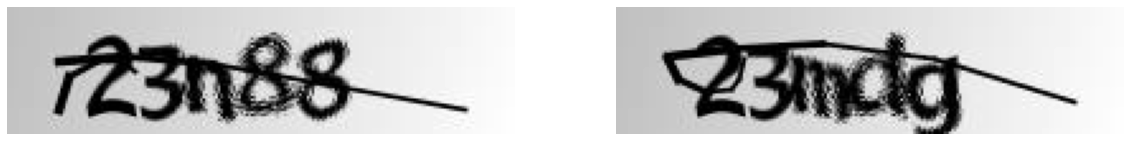

In [5]:
plot_(img1, img2)

***********************
### Adaptive Thresholding
Algorithms determine the threshold for a pixel based on its surrounding regions. So we get different thresholds for different regions of the same image which gives better result for images with varying illumination.

In [6]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

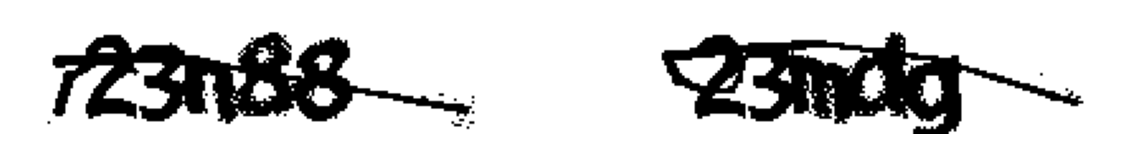

In [7]:
plot_(thresh_img1, thresh_img2)

### Closing
Dilation followed by Erosion.

In [8]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

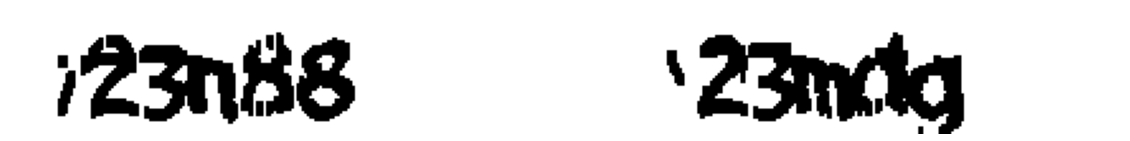

In [9]:
plot_(close_img1, close_img2)

### Dilation
Involves a kernel being scanned over the entire image. The maximal pixel value is calculated in the kernel region and the anchor point of the kernel is updated to that value. This causes the white region to expand in the image.

In [10]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

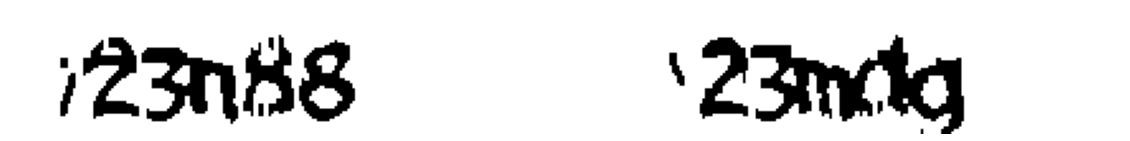

In [11]:
plot_(dilate_img1, dilate_img2)

### Smoothing Images (Blurring)
Involves convolving a low-pass filter with an image, to remove high frequency components ie. noises and edges from the image.

In [12]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)

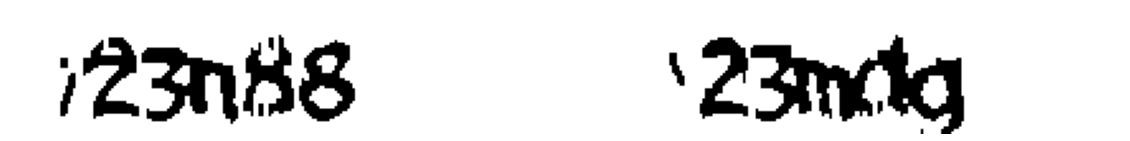

In [13]:
plot_(gauss_img1, gauss_img2)

### PartitioningBatchNormalization

In [14]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

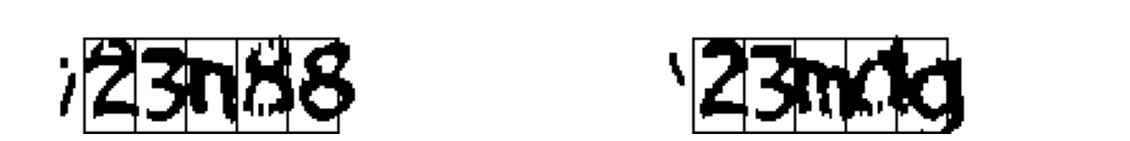

In [15]:
plot_(gauss_img1, gauss_img2)

### Converting images to appropriate samples

In [16]:
path = '../input/captcha-version-2-images/samples/'

In [17]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)

In [18]:
import os
from PIL import Image
from keras.preprocessing.image import img_to_array, ImageDataGenerator

In [19]:
X = []
y = []

for image in os.listdir(path) :
    
    if image[6:] != 'png' :
        continue
    
    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [20]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


*****************
## Initial Analysis and Data Wrangling
Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. 

### Scale b/w 0 and 1

In [21]:
X /= 255.0

[]

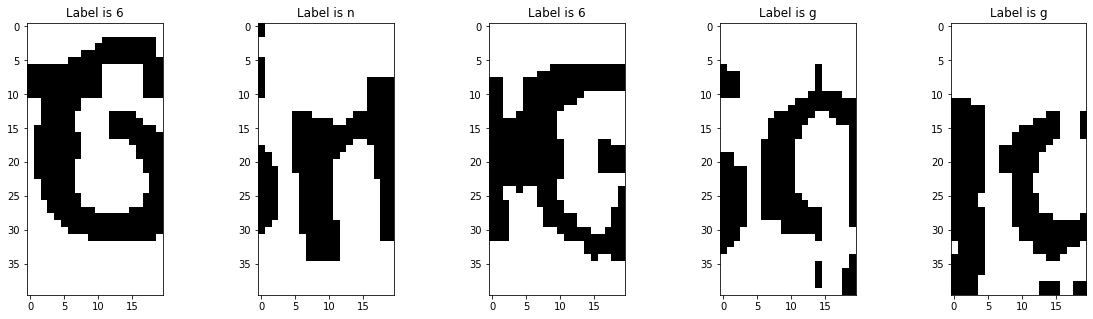

In [22]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [23]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of 5 : 281
Occurance count of 2 : 265
Occurance count of w : 235
Occurance count of p : 253
Occurance count of 6 : 259
Occurance count of d : 259
Occurance count of f : 271
Occurance count of x : 264
Occurance count of e : 235
Occurance count of g : 271
Occurance count of n : 525
Occurance count of b : 240
Occurance count of m : 275
Occurance count of 3 : 267
Occurance count of 8 : 264
Occurance count of 4 : 284
Occurance count of y : 232
Occurance count of c : 262
Occurance count of 7 : 258


In [24]:
 temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})

Text(0.5, 1.0, 'Label distribution in CAPTCHAS')

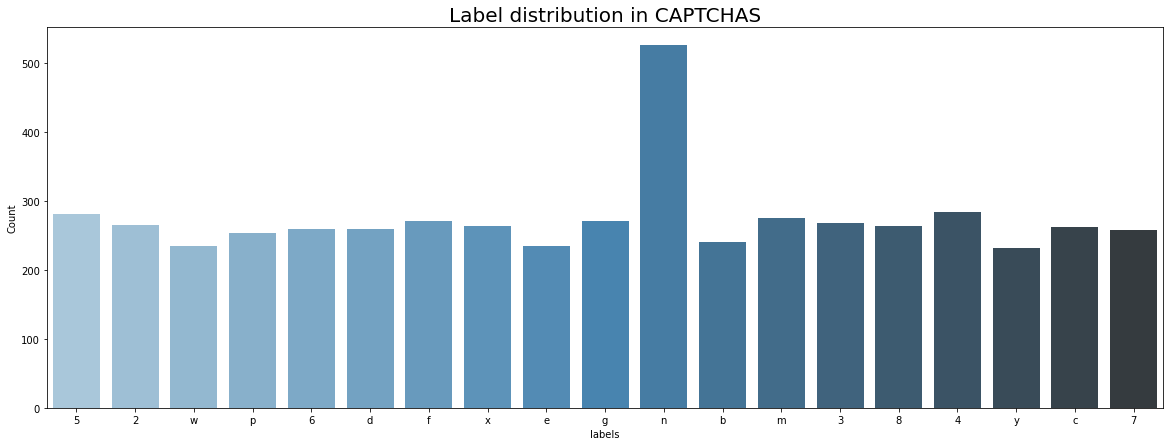

In [25]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in CAPTCHAS', fontsize = 20)

The count of label **n** is almost twice as any other label, so more samples of this letter will be put in the test set.

### One hot encoding
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse = False).fit_transform(y_combine.reshape(len(y_combine),1))

In [27]:
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter n : n
label : 14
Count : 525


In [28]:
info = {y_combine[i] : y[i] for i in range(len(y))}

### Spliting the Dataset
* Spliting the dataset in 80:20 ratio.
* Name the training model as x_train and y_train.
* Name the testing model as x_test and y_test.
* deploy the models using the dataset

In [29]:
print(X.shape)
print(y_one_hot.shape)  # one hot encoded form

(5200, 40, 20, 1)
(5200, 19)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [32]:
y_temp = np.argmax(y_test, axis = 1)

In [33]:
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})

Text(0.5, 1.0, 'Label distribution in test set')

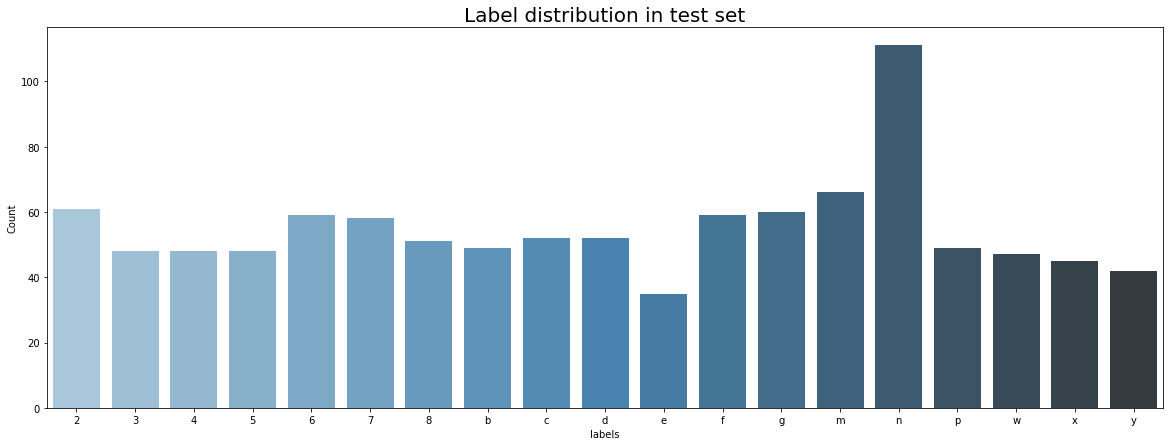

In [34]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in test set', fontsize = 20)

***********************************************
## Recognition Model Creation
CNN’s were first developed and used around the 1980s. The most that a CNN could do at that time was recognize handwritten digits. It was mostly used in the postal sectors to read zip codes, pin codes, etc. The important thing to remember about any deep learning model is that it requires a large amount of data to train and also requires a lot of computing resources. This was a major drawback for CNNs at that period and hence CNNs were only limited to the postal sectors and it failed to enter the world of machine learning.

![](https://editor.analyticsvidhya.com/uploads/183560_qcMBDPuKpDvICcdd.png)

In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery. Now when we think of a neural network we think about matrix multiplications but that is not the case with ConvNet. It uses a special technique called Convolution. Now in mathematics convolution is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.

Let's create the model!

In [35]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input

In [36]:
print(X_train.shape)
print(y_train.shape)

(4160, 40, 20, 1)
(4160, 19)


In [37]:
print(X_test.shape)
print(y_test.shape)

(1040, 40, 20, 1)
(1040, 19)


**Convolution Layer Creation**

In [38]:
def conv_layer (filterx) :
    
    model = Sequential()
    
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    
    return model

**Dense Layer Creation**

In [39]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

**Getting together all the layers**

In [40]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    
    model = Sequential()
    model.add(Input((40, 20, 1,)))
    
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    
    model.add(Dense(19, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

### Data augmentation and Oversampling

### SMOTE
SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

In [41]:
X_train = np.reshape(X_train, (4160, 40*20*1))

In [42]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [43]:
print(X_train.shape)
print(y_train.shape)

(7866, 800)
(7866, 19)


In [44]:
X_train = np.reshape(X_train, (7866, 40, 20, 1))

Oversampled images

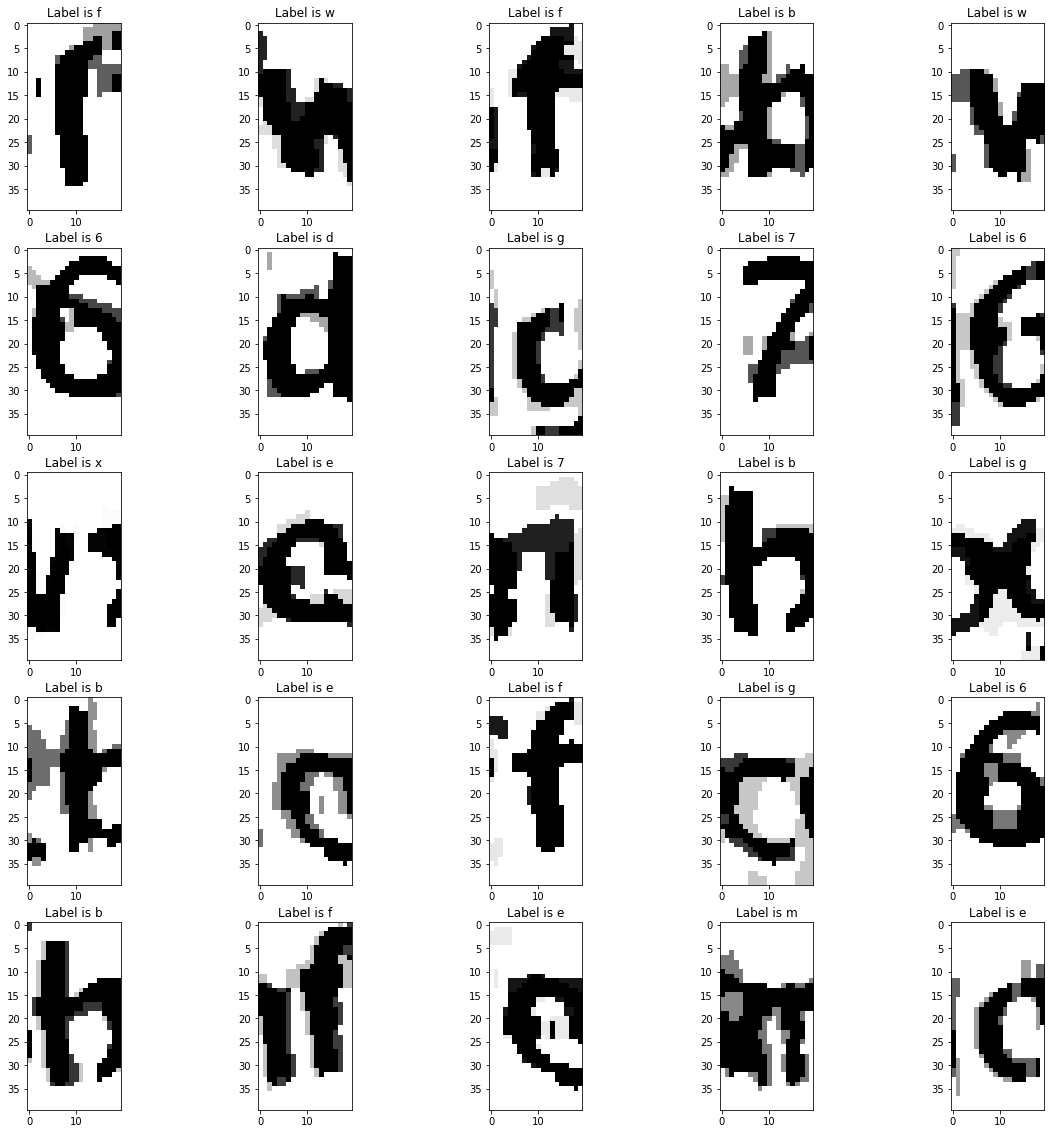

In [45]:
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()

### ImageDataGenerator

In [46]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)

In [47]:
train_set = traingen.flow(X_train, y_train)

In [48]:
trainX, trainy = train_set.next()

Augmented images with rotations and shifts.

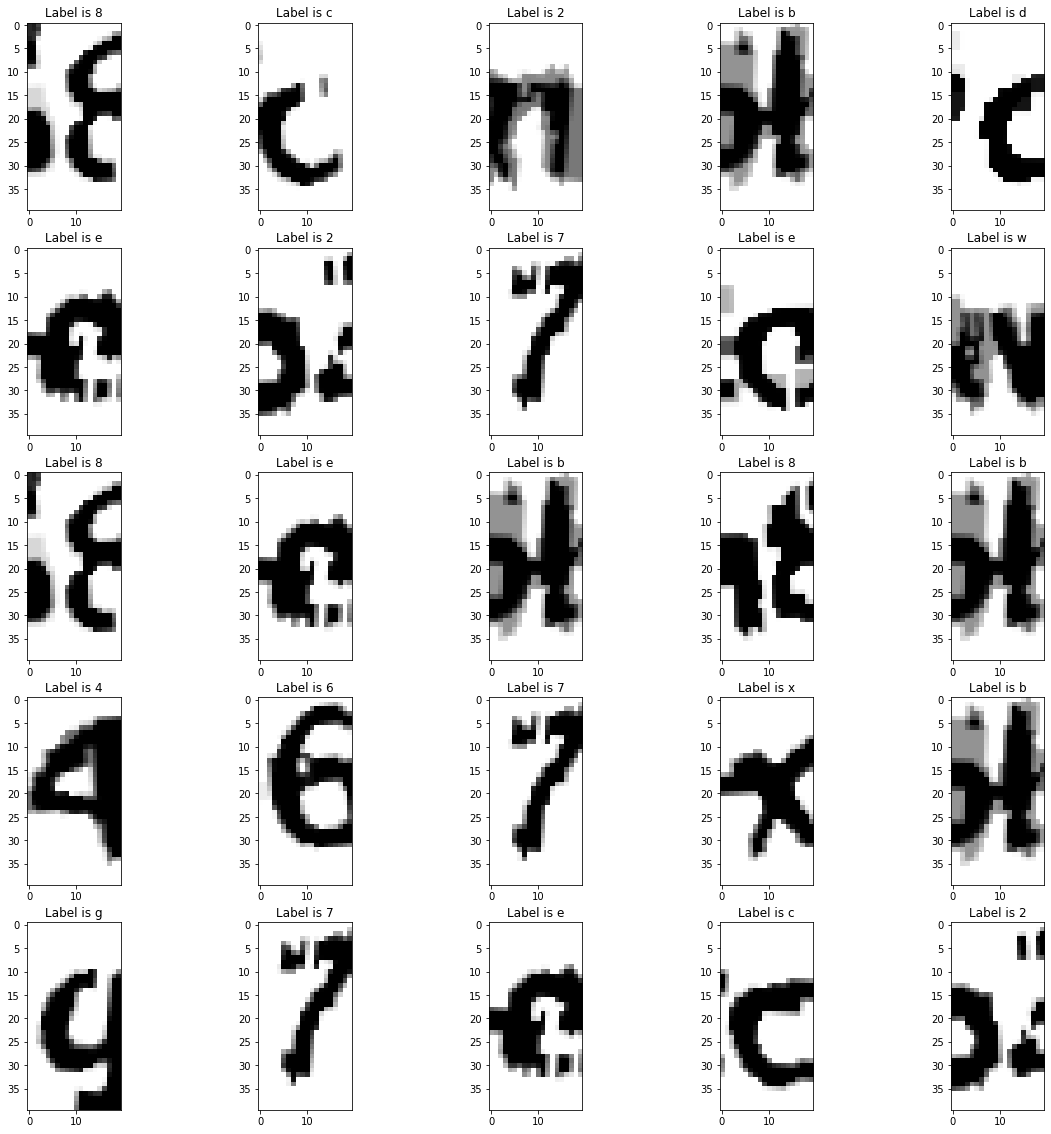

In [49]:
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

### Model Training

In [50]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 20, 10, 128)       1792      
_________________________________________________________________
sequential_2 (Sequential)    (None, 10, 5, 32)         37024     
_________________________________________________________________
sequential_3 (Sequential)    (None, 5, 3, 16)          4688      
_________________________________________________________________
flatten (Flatten)            (None, 240)               0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 32)                7840      
_________________________________________________________________
sequential_5 (Sequential)    (None, 32)                1184      
_________________________________________________________________
dense_2 (Dense)              (None, 19)                6

### ModelCheckpoint and ReduceLROnPlateau
Used ModelCheckpoint to retain the best perfroming model (in terms of loss), and ReduceLROnPlateau to reduce the learning in case the model stops improving.

In [51]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [52]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [53]:
print(X_train.shape)
print(y_train.shape)

(7866, 40, 20, 1)
(7866, 19)


In [54]:
history = model.fit(traingen.flow(X_train, y_train, batch_size = 32), validation_data = (X_test, y_test), epochs = 150, steps_per_epoch = len(X_train)/32, callbacks = [checkp])

Epoch 1/150
245/245 [==============================] - 9s 15ms/step - loss: 2.8592 - accuracy: 0.1810 - val_loss: 2.9403 - val_accuracy: 0.1288

Epoch 00001: val_loss improved from inf to 2.94030, saving model to ./result_model.h5
Epoch 2/150
245/245 [==============================] - 3s 13ms/step - loss: 1.6011 - accuracy: 0.5308 - val_loss: 1.6151 - val_accuracy: 0.5952

Epoch 00002: val_loss improved from 2.94030 to 1.61509, saving model to ./result_model.h5
Epoch 3/150
245/245 [==============================] - 3s 12ms/step - loss: 1.0971 - accuracy: 0.6934 - val_loss: 0.7857 - val_accuracy: 0.7769

Epoch 00003: val_loss improved from 1.61509 to 0.78566, saving model to ./result_model.h5
Epoch 4/150
245/245 [==============================] - 3s 12ms/step - loss: 0.8789 - accuracy: 0.7616 - val_loss: 0.7314 - val_accuracy: 0.8096

Epoch 00004: val_loss improved from 0.78566 to 0.73143, saving model to ./result_model.h5
Epoch 5/150
245/245 [==============================] - 3s 12ms/s

### Checking the accuracy of the model

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

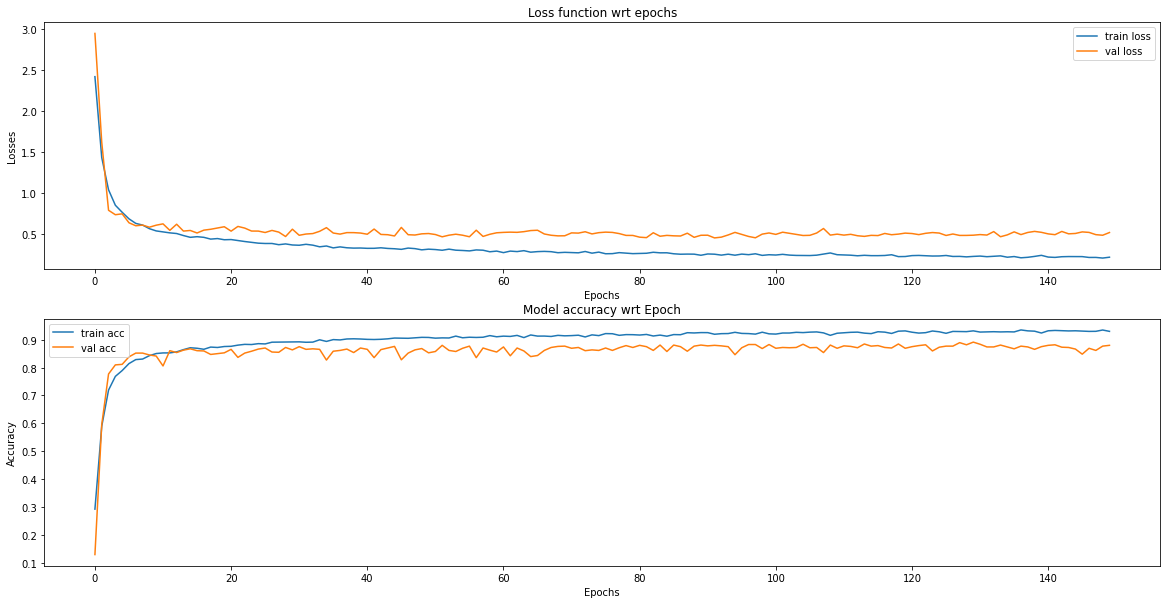

In [55]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

### Prediction

In [56]:
from keras.models import load_model

In [57]:
model = load_model('./result_model.h5')

In [58]:
pred = model.predict(X_test)

Perfromed numpy argmax to obtain the value which has the highest probability of being the truth value.

In [59]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [60]:
from sklearn.metrics import accuracy_score, classification_report

In [61]:
target_name = []
for i in sorted(info) :
    target_name.append(info[i])

In [62]:
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [63]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.8798076923076923
              precision    recall  f1-score   support

           2       0.88      0.95      0.91        61
           3       0.94      0.94      0.94        48
           4       0.94      0.94      0.94        48
           5       1.00      0.96      0.98        48
           6       0.92      0.93      0.92        59
           7       0.96      0.83      0.89        58
           8       0.96      0.92      0.94        51
           b       0.94      0.98      0.96        49
           c       0.89      0.79      0.84        52
           d       0.75      0.92      0.83        52
           e       0.90      0.80      0.85        35
           f       0.90      0.95      0.93        59
           g       0.97      0.93      0.95        60
           m       0.69      0.53      0.60        66
           n       0.76      0.85      0.80       111
           p       0.87      0.84      0.85        49
           w       0.83      0.91      0.87        

### Testing on samples

In [64]:
def get_demo (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    
    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

#### Samples for which model identified correctly.

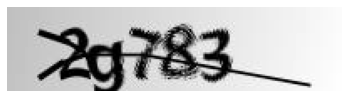

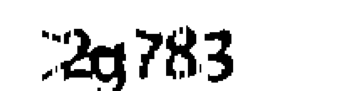

2
g
7
8
3
2g783.png


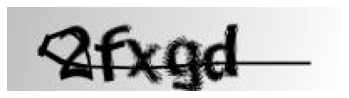

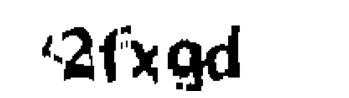

2
f
x
g
d
2fxgd.png


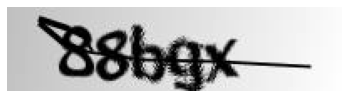

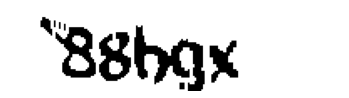

8
8
b
g
x
88bgx.png


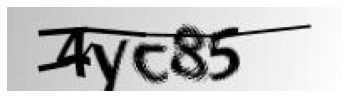

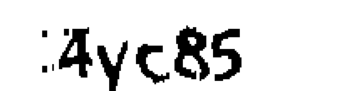

4
y
c
8
5
4yc85.png


In [65]:
get_demo('../input/captcha-version-2-images/samples/2g783.png')
get_demo('../input/captcha-version-2-images/samples/2fxgd.png')
get_demo('../input/captcha-version-2-images/samples/88bgx.png')
get_demo('../input/captcha-version-2-images/samples/4yc85.png')

#### Samples where model made errors while identification.

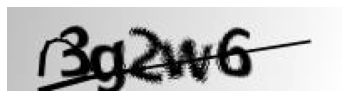

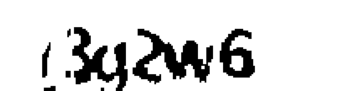

3
g
2
w
d
3g2w6.png


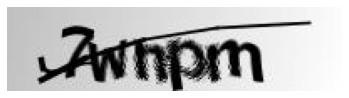

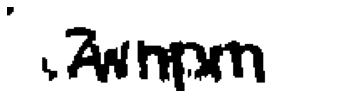

7
w
m
p
m
7wnpm.png


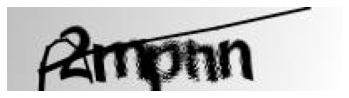

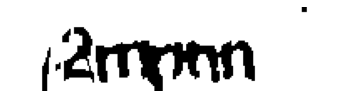

2
n
p
m
m
2mpnn.png


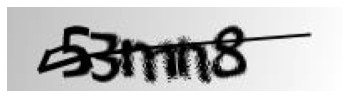

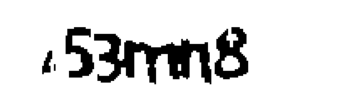

5
3
m
m
8
53mn8.png


In [66]:
get_demo('../input/captcha-version-2-images/samples/3g2w6.png')
get_demo('../input/captcha-version-2-images/samples/7wnpm.png')
get_demo('../input/captcha-version-2-images/samples/2mpnn.png')
get_demo('../input/captcha-version-2-images/samples/53mn8.png')

***********************
## Conclusion
* Convolution Neural Network provides the luxury of detecting the images in a single model frame work.
* Here we have deployed the CNN model successfully, and it is working perfectly, recognizing the CAPTCHAs correctly.
* The model is having the accuracy of 0.88, macro average of 0.89 and weighted average of 0.88.
* Using the Convolution Neural Network along with the SMOTE and ReduceLROnPlateau makes the model more accurate than the baseline model.
* For me, it would be the best model to identify the CAPTCHA images and recognize them easily!
* ***Convolution Neural Network with SMOTE and ReduceLROnPlateau*** is the best model to be fitted.
**************************************

### Thank You!